# National Endowment for the Arts #

## Code Overview ##
1. **Importing Libraries and Loading Data**
    - ***Libraries:*** The code utilizes several libraries:
        - `pandas`: For data manipulation and cleaning.
        - `plotly.express`: For creating interactive visualizations.
        - `dash`: For building an interactive web application.
        - `dash_ag_grid`: For creating an interactive table grid.
        - `geopy`: For geocoding to convert hometown names to geographic coordinates.
    - ***Data Loading:*** The dataset is loaded from a CSV file (`Post45_NEAData_Final.csv`) into a Pandas DataFrame (`df`).
2. **Data Cleaning and Transformation**
    - ***Handling Missing Values:*** The dataset is cleaned by filling missing values:
        - `birth_year`: Filled with the median birth year.
        - `state` and `hometown`: Filled with the string 'Unknown'.
    - ***Feature Creation:***
        - A new column, `age of writer`, is created by subtracting the birth year from the year the grant was awarded.
        - The `age_group` column categorizes writers into age groups based on their age at the time of the grant.
    - ***State and Hometown Analysis:***
        - The count of grants by state is calculated and stored in `grants_by_state`.
        - The count of writers by hometown is calculated and stored in `writers_by_hometown`.
    - ***Geocoding Hometowns:*** The `geopy` library is used to add `latitude` and `longitude` data for each writer's hometown, enabling map visualization of hometowns.
    - ***University Count:*** A new feature, `university_count`, is created, indicating the number of universities each writer attended based on various columns.
3. **Exploratory Data Analysis (EDA)**
    - ***Grants by State and Hometown:***
        - The `grants_by_state` DataFrame counts the number of grants awarded by U.S. state.
        - The `writers_by_hometown` DataFrame counts the number of writers from each hometown.
    - ***Grants and Writers by Year:*** The total count of grants per year is calculated and stored in `grants_per_year`.
    - ***University Count Analysis:*** The dataset is analyzed for the relationship between the number of universities a writer attended and the number of grants awarded.
4. **Data Visualization**
    - ***Writer Age Distribution:*** A histogram visualizes the distribution of writers' ages at the time of the grant, colored by age group.
    - ***Age Group Distribution:*** A pie chart visualizes the distribution of writers across different age groups.
    - ***University Count Distribution:*** A histogram is created to show the distribution of the number of universities attended by writers.
    - ***University Count vs. Grant Count:*** A bar chart is created to visualize the relationship between the number of universities attended and the number of grants awarded.
    - ***Grants by State:*** A choropleth map visualizes the number of grants awarded by state, with colors representing grant count.
    - ***Writers by Hometown (Bar Chart):*** A bar chart shows the top 10 hometowns based on writer count.
    - ***Writers by Hometown (Map):*** A scatter map visualizes the geographical distribution of writers' hometowns.
    - ***Grants per Year:*** A line chart visualizes the trend of grant counts over time.
5. **Dashboard Creation with Dash**
    - ***Interactive Grid:** A data grid is created using `dash_ag_grid` to display the dataset interactively, allowing pagination.
    - ***Interactive Visualizations:*** Several graphs are created using `dcc.Graph`, representing the visualizations mentioned above.
    - ***App Layout:*** The Dash app layout includes the data grid and all the visualizations, enabling users to explore the data dynamically through a web-based interface.
    - ***Running the App:*** The Dash app is set to run in debug mode, serving the interactive dashboard to the user through a local web server.

### 1. Import libraries ###

In [2]:
pip install dash_ag_grid

   ---------------------------------------- 0.0/3.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.9 MB ? eta -:--:--
   ----- ---------------------------------- 0.5/3.9 MB 3.4 MB/s eta 0:00:01
   ------------------ --------------------- 1.8/3.9 MB 5.3 MB/s eta 0:00:01
   ----------------------------- ---------- 2.9/3.9 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 3.9/3.9 MB 5.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html
import dash_ag_grid as dag
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

### 2. Load and clean dataset ###

In [2]:
df = pd.read_csv('Post45_NEAData_Final.csv')
df

,nea_person_id,full_name_lastfirst,full_name_firstlast,given_name_middle,family_name,nea_grant_year,other_nea_grant,country,us_state,hometown,...,gender,race_ethnicity,ba,ba2,ma,ma2,phd,mfa,mfa2,post45_hathi_entry
0,19,"Adams, Leonie",Leonie Adams,Leonie,Adams,1966,NaN,USA,NY,New York,...,female,uniden,Barnard College,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,177,"Belitt, Ben",Ben Belitt,Ben,Belitt,1966,NaN,USA,VT,Bennington,...,male,uniden,University of Virginia,NaN,University of Virginia,NaN,NaN,NaN,NaN,NaN
2,235,"Bird, Laurel",Laurel Bird,Laurel,Bird,1966,NaN,USA,TN,Knoxville,...,female,uniden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,282,"Bourjaily, Vance",Vance Bourjaily,Vance,Bourjaily,1966,1979,USA,IA,Iowa City,...,male,uniden,Bowdoin College,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,303,"Brasfield, Samuel",Samuel Brasfield,Samuel,Brasfield,1966,NaN,USA,AL,Demopolis,...,male,uniden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3700,3199,"Sikmashvili, Darina (Dasha)",Darina (Dasha) Sikmashvili,Darina (Dasha),Sikmashvili,2024,NaN,USA,NY,New York City,...,female,uniden / ukranianam,NaN,NaN,NaN,NaN,NaN,University of Michigan Ann Arbor,NaN,NaN
3701,3203,"South, Mary",Mary South,Mary,South,2024,NaN,USA,NY,New York City,...,female,uniden,Northwestern University,NaN,NaN,NaN,NaN,Columbia University,NaN,NaN
3702,3205,"Taffa, Deborah Jackson",Deborah Jackson Taffa,Deborah Jackson,Taffa,2024,NaN,USA,NM,Sante Fe,...,female,indigenous,Webster University,NaN,NaN,NaN,NaN,University of Iowa,NaN,NaN
3703,3209,"Towers, Paige",Paige Towers,Paige,Towers,2024,NaN,USA,WA,Bellingham,...,female,uniden,University of Iowa,NaN,NaN,NaN,NaN,Emerson College,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3705 entries, 0 to 3704
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nea_person_id        3705 non-null   int64  
 1   full_name_lastfirst  3705 non-null   object 
 2   full_name_firstlast  3705 non-null   object 
 3   given_name_middle    3705 non-null   object 
 4   family_name          3705 non-null   object 
 5   nea_grant_year       3705 non-null   int64  
 6   other_nea_grant      933 non-null    object 
 7   country              3705 non-null   object 
 8   us_state             3387 non-null   object 
 9   hometown             3705 non-null   object 
 10  birth_year           2915 non-null   float64
 11  gender               3704 non-null   object 
 12  race_ethnicity       3704 non-null   object 
 13  ba                   2973 non-null   object 
 14  ba2                  73 non-null     object 
 15  ma                   1271 non-null   o

### 3. Сlean dataset ###

In [4]:
df = df.fillna({
    'birth_year': df['birth_year'].median(),
    'state': 'Unknown',
    'hometown': 'Unknown'
})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3705 entries, 0 to 3704
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nea_person_id        3705 non-null   int64  
 1   full_name_lastfirst  3705 non-null   object 
 2   full_name_firstlast  3705 non-null   object 
 3   given_name_middle    3705 non-null   object 
 4   family_name          3705 non-null   object 
 5   nea_grant_year       3705 non-null   int64  
 6   other_nea_grant      933 non-null    object 
 7   country              3705 non-null   object 
 8   us_state             3387 non-null   object 
 9   hometown             3705 non-null   object 
 10  birth_year           3705 non-null   float64
 11  gender               3704 non-null   object 
 12  race_ethnicity       3704 non-null   object 
 13  ba                   2973 non-null   object 
 14  ba2                  73 non-null     object 
 15  ma                   1271 non-null   o

### 4. Analize datase ###

In [5]:
# Create a new feature: 'age of writer'
df['age of writer'] = df['nea_grant_year'] - df['birth_year']
df.head()

,nea_person_id,full_name_lastfirst,full_name_firstlast,given_name_middle,family_name,nea_grant_year,other_nea_grant,country,us_state,hometown,...,race_ethnicity,ba,ba2,ma,ma2,phd,mfa,mfa2,post45_hathi_entry,age of writer
0,19,"Adams, Leonie",Leonie Adams,Leonie,Adams,1966,NaN,USA,NY,New York,...,uniden,Barnard College,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.0
1,177,"Belitt, Ben",Ben Belitt,Ben,Belitt,1966,NaN,USA,VT,Bennington,...,uniden,University of Virginia,NaN,University of Virginia,NaN,NaN,NaN,NaN,NaN,55.0
2,235,"Bird, Laurel",Laurel Bird,Laurel,Bird,1966,NaN,USA,TN,Knoxville,...,uniden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0
3,282,"Bourjaily, Vance",Vance Bourjaily,Vance,Bourjaily,1966,1979,USA,IA,Iowa City,...,uniden,Bowdoin College,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0
4,303,"Brasfield, Samuel",Samuel Brasfield,Samuel,Brasfield,1966,NaN,USA,AL,Demopolis,...,uniden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0


In [6]:
# Categorize writers based on age groups
df['age_group'] = pd.cut(
    df['age of writer'],
    bins=[0, 30, 50, 70, 100],
    labels=['<30', '30-50', '50-70', '70+']
)
df.head()

,nea_person_id,full_name_lastfirst,full_name_firstlast,given_name_middle,family_name,nea_grant_year,other_nea_grant,country,us_state,hometown,...,ba,ba2,ma,ma2,phd,mfa,mfa2,post45_hathi_entry,age of writer,age_group
0,19,"Adams, Leonie",Leonie Adams,Leonie,Adams,1966,NaN,USA,NY,New York,...,Barnard College,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.0,50-70
1,177,"Belitt, Ben",Ben Belitt,Ben,Belitt,1966,NaN,USA,VT,Bennington,...,University of Virginia,NaN,University of Virginia,NaN,NaN,NaN,NaN,NaN,55.0,50-70
2,235,"Bird, Laurel",Laurel Bird,Laurel,Bird,1966,NaN,USA,TN,Knoxville,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,<30
3,282,"Bourjaily, Vance",Vance Bourjaily,Vance,Bourjaily,1966,1979,USA,IA,Iowa City,...,Bowdoin College,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,30-50
4,303,"Brasfield, Samuel",Samuel Brasfield,Samuel,Brasfield,1966,NaN,USA,AL,Demopolis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,<30


In [7]:
# Count of grants by state
grants_by_state = df['us_state'].value_counts().reset_index()
grants_by_state.columns = ['us_state', 'grant_count']
grants_by_state.head()

,us_state,grant_count
0,NY,643
1,CA,467
2,MA,235
3,TX,117
4,PA,117


In [8]:
# Count of writers by hometown
writers_by_hometown = df['hometown'].value_counts().reset_index()
writers_by_hometown.columns = ['hometown', 'writer_count']
writers_by_hometown.head()

,hometown,writer_count
0,No city listed,367
1,New York,347
2,San Francisco,106
3,Brooklyn,69
4,Chicago,52


In [9]:
# Geocoding hometowns for map visualization
geolocator = Nominatim(user_agent='nea_analysis')
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Adding latitude and longitude for hometowns
writers_by_hometown['location'] = writers_by_hometown['hometown'].apply(geocode)
writers_by_hometown['latitude'] = writers_by_hometown['location'].apply(lambda loc: loc.latitude if loc else None)
writers_by_hometown['longitude'] = writers_by_hometown['location'].apply(lambda loc: loc.longitude if loc else None)
writers_by_hometown.head()

,hometown,writer_count,location,latitude,longitude
0,No city listed,367,None,NaN,NaN
1,New York,347,"(City of New York, New York, United States, (4...",40.712728,-74.006015
2,San Francisco,106,"(San Francisco, California, United States, (37...",37.779259,-122.419329
3,Brooklyn,69,"(Brooklyn, Kings County, City of New York, New...",40.652601,-73.949721
4,Chicago,52,"(Chicago, Cook County, Illinois, United States...",41.875562,-87.624421


In [10]:
# Filter out rows without location data for visualization
writers_by_hometown_map = writers_by_hometown.dropna(subset=['latitude', 'longitude'])
writers_by_hometown_map.head()

,hometown,writer_count,location,latitude,longitude
1,New York,347,"(City of New York, New York, United States, (4...",40.712728,-74.006015
2,San Francisco,106,"(San Francisco, California, United States, (37...",37.779259,-122.419329
3,Brooklyn,69,"(Brooklyn, Kings County, City of New York, New...",40.652601,-73.949721
4,Chicago,52,"(Chicago, Cook County, Illinois, United States...",41.875562,-87.624421
5,Berkeley,52,"(Berkeley, Alameda County, California, United ...",37.870839,-122.272863


In [11]:
# Counting universities
df['university_count'] = df[['ba', 'ba2', 'ma', 'ma2', 'phd', 'mfa', 'mfa2', 'post45_hathi_entry']].notna().sum(axis=1)

In [13]:
# Count of grants per year
grants_per_year = df.groupby('nea_grant_year').size().reset_index(name='grant_count')
grants_per_year.head()

,nea_grant_year,grant_count
0,1966,47
1,1967,23
2,1968,55
3,1969,48
4,1970,41


### 5. Create a Dash app ###

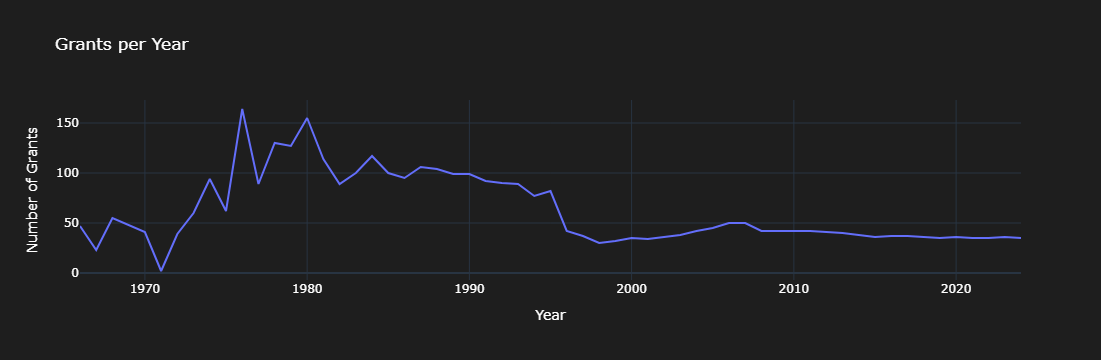

In [22]:
# Visualization: University count distribution
fig_university_count = px.histogram(
    df,
    x='university_count',
    title='Distribution of University Count per Writer',
    labels={'university_count': 'Number of Universities'},
    nbins=10,
    template='plotly_dark'
)
fig_university_count.update_layout(
    plot_bgcolor='#1e1e1e',
    paper_bgcolor='#1e1e1e',
    font_color='white'
)

# Visualization: University count vs. grant count
fig_university_vs_grant = px.bar(
    df.groupby('university_count').size().reset_index(name='grant_count'),
    x='university_count',
    y='grant_count',
    title='University Count vs. Grant Count',
    labels={
        'university_count': 'Number of Universities',
        'grant_count': 'Number of Grants'
    },
    template='plotly_dark'
)
fig_university_vs_grant.update_layout(
    plot_bgcolor='#1e1e1e',
    paper_bgcolor='#1e1e1e',
    font_color='white'
)

# Visualization: Histogram
fig_histogram = px.histogram(
    df,
    x='age of writer',
    color='age_group',
    title='Distribution of Writers by Age at Time of Grant',
    labels={'age of writer': 'Age of Writer'},
    nbins=20,
    template='plotly_dark'
)
fig_histogram.update_layout(
    plot_bgcolor='#1e1e1e',
    paper_bgcolor='#1e1e1e',
    font_color='white'
)

# visualization: Age group distribution
fig_pie = px.pie(
    df,
    names='age_group',
    title='Age Group Distribution of Writers',
    template='plotly_dark'
)
fig_pie.update_layout(
    plot_bgcolor='#1e1e1e',
    paper_bgcolor='#1e1e1e',
    font_color='white'
)

# Visualization: Grants by State (Map)
fig_map = px.choropleth(
    grants_by_state,
    locations='us_state',
    locationmode='USA-states',
    color='grant_count',
    color_continuous_scale='Viridis',
    scope='usa',
    title='Grants by State'
)
fig_map.update_layout(
    plot_bgcolor='#1e1e1e',
    paper_bgcolor='#1e1e1e',
    font_color='white'
)

# Visualization: Writers by Hometown (Bar Chart)
fig_hometown = px.bar(
    writers_by_hometown.iloc[1:11],
    x='hometown',
    y='writer_count',
    title='Top 10 Hometowns of Writers',
    labels={
        'hometown': 'Hometown',
        'writer_count': 'Writer Count'
    },
    template='plotly_dark'
)
fig_hometown.update_layout(
    plot_bgcolor='#1e1e1e',
    paper_bgcolor='#1e1e1e',
    font_color='white'
)

# Visualization: Writers by Hometown (Map)
fig_hometown_map = px.scatter_geo(
    writers_by_hometown_map,
    lat='latitude',
    lon='longitude',
    size='writer_count',
    hover_name='hometown',
    title='Writers by Hometown (Map)',
    template='plotly_dark'
)
fig_hometown_map.update_layout(
    geo=dict(
        showland=True,
        landcolor='#1e1e1e',
        showocean=True,
        oceancolor='#000033',
        projection_type='natural earth'
    ),
    plot_bgcolor='#1e1e1e',
    paper_bgcolor='#1e1e1e',
    font_color='white'
)

# Visualization: Grants per year
fig_grants_per_year = px.line(
    grants_per_year,
    x='nea_grant_year',
    y='grant_count',
    title='Grants per Year',
    labels={
        'nea_grant_year': 'Year',
        'grant_count': 'Number of Grants'
    },
    template='plotly_dark'
)
fig_grants_per_year.update_layout(
    plot_bgcolor='#1e1e1e',
    paper_bgcolor='#1e1e1e',
    font_color='white'
)

In [23]:
# Create a Dash app
app = Dash()

grid = dag.AgGrid(
    rowData=df.to_dict("records"),
    columnDefs=[{"field": i} for i in df.columns],
    dashGridOptions={"pagination": True}
)

app.layout = html.Div([
    grid,
    dcc.Graph(figure=fig_histogram),
    dcc.Graph(figure=fig_pie),
    dcc.Graph(figure=fig_university_count),
    dcc.Graph(figure=fig_university_vs_grant),
    dcc.Graph(figure=fig_map),
    dcc.Graph(figure=fig_hometown),
    dcc.Graph(figure=fig_hometown_map),
    dcc.Graph(figure=fig_grants_per_year)
])

if __name__ == "__main__":
    app.run_server(debug=True)